In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
import networkx as nx
from networkx.algorithms import community

## Working with Spatial Data. Network Analysis

### Live Demo

In [3]:
earthquake_data = pd.read_csv("./data/earthquakes.csv")

In [4]:
earthquake_data.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [5]:
earthquake_data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [6]:
earthquake_data.Type.unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [7]:
earthquake_data.shape

(23412, 21)

In [8]:
earthquake_data = earthquake_data[["Date", "Time", "Latitude", "Longitude", "Magnitude", "Depth"]]

In [9]:
earthquake_data.head()

,Date,Time,Latitude,Longitude,Magnitude,Depth
0,01/02/1965,13:44:18,19.246,145.616,6.0,131.6
1,01/04/1965,11:29:49,1.863,127.352,5.8,80.0
2,01/05/1965,18:05:58,-20.579,-173.972,6.2,20.0
3,01/08/1965,18:49:43,-59.076,-23.557,5.8,15.0
4,01/09/1965,13:32:50,11.938,126.427,5.8,15.0


In [10]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time
print(dt_info)
earthquake_data = earthquake_data.drop(index = dt_info[dt_info.str.len() > 20].index)
earthquake_data["DateTime"] = pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)

0        01/02/1965 13:44:18
1        01/04/1965 11:29:49
2        01/05/1965 18:05:58
3        01/08/1965 18:49:43
4        01/09/1965 13:32:50
5        01/10/1965 13:36:32
6        01/12/1965 13:32:25
7        01/15/1965 23:17:42
8        01/16/1965 11:32:37
9        01/17/1965 10:43:17
10       01/17/1965 20:57:41
11       01/24/1965 00:11:17
12       01/29/1965 09:35:30
13       02/01/1965 05:27:06
14       02/02/1965 15:56:51
15       02/04/1965 03:25:00
16       02/04/1965 05:01:22
17       02/04/1965 06:04:59
18       02/04/1965 06:37:06
19       02/04/1965 06:39:32
20       02/04/1965 07:11:23
21       02/04/1965 07:14:59
22       02/04/1965 07:23:12
23       02/04/1965 07:43:43
24       02/04/1965 08:06:17
25       02/04/1965 08:33:41
26       02/04/1965 08:40:44
27       02/04/1965 12:06:08
28       02/04/1965 12:50:59
29       02/04/1965 14:18:29
                ...         
23382    12/11/2016 17:26:10
23383    12/14/2016 02:01:23
23384    12/14/2016 21:14:56
23385    12/16

In [12]:
earthquake_data.head()

,Date,Time,Latitude,Longitude,Magnitude,Depth,DateTime
0,01/02/1965,13:44:18,19.246,145.616,6.0,131.6,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.863,127.352,5.8,80.0,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.579,-173.972,6.2,20.0,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.076,-23.557,5.8,15.0,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.938,126.427,5.8,15.0,1965-01-09 13:32:50


In [13]:
earthquake_data.dtypes

Date                 object
Time                 object
Latitude            float64
Longitude           float64
Magnitude           float64
Depth               float64
DateTime     datetime64[ns]
dtype: object

In [14]:
earthquake_data = earthquake_data.drop(["Date", "Time"], axis = 1)

In [15]:
earthquake_data.head()

,Latitude,Longitude,Magnitude,Depth,DateTime
0,19.246,145.616,6.0,131.6,1965-01-02 13:44:18
1,1.863,127.352,5.8,80.0,1965-01-04 11:29:49
2,-20.579,-173.972,6.2,20.0,1965-01-05 18:05:58
3,-59.076,-23.557,5.8,15.0,1965-01-08 18:49:43
4,11.938,126.427,5.8,15.0,1965-01-09 13:32:50


In [16]:
earthquake_data.DateTime.min(), earthquake_data.DateTime.max()

(Timestamp('1965-01-02 13:44:18'), Timestamp('2016-12-30 20:08:28'))

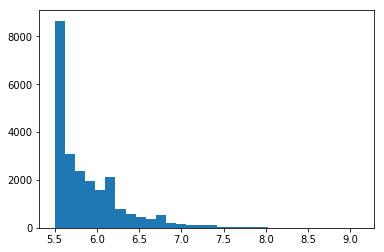

In [17]:
plt.hist(earthquake_data.Magnitude, bins = 30)
plt.show()

In [18]:
earthquake_data[earthquake_data.Magnitude == earthquake_data.Magnitude.max()]

,Latitude,Longitude,Magnitude,Depth,DateTime
17083,3.295,95.982,9.1,30.0,2004-12-26 00:58:53
20501,38.297,142.373,9.1,29.0,2011-03-11 05:46:24


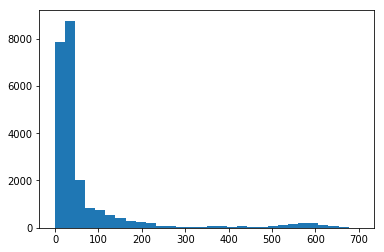

In [19]:
plt.hist(earthquake_data.Depth, bins= 30)
plt.show()

### Working with Graphs

In [23]:
# Create a simple weighted undirected graph
g = nx.Graph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

In [24]:
g.nodes

NodeView(('a', 'b', 'c', 'd'))

In [25]:
g.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

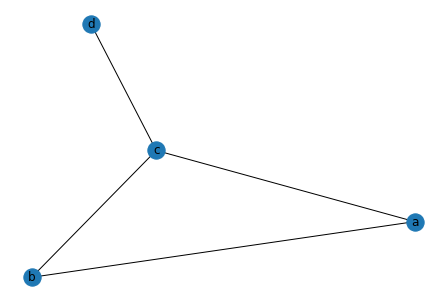

In [26]:
nx.draw(g, with_labels = True)
plt.show()

In [27]:
pos = nx.spring_layout(g)

In [28]:
pos

{'a': array([-0.81058013,  0.60993503]),
 'b': array([0.74267674, 0.51860593]),
 'c': array([ 0.03382882, -0.12854096]),
 'd': array([ 0.03407456, -1.        ])}

In [29]:
weights = nx.get_edge_attributes(g, "weight")
weights

{('a', 'b'): 0.1, ('a', 'c'): 1.0, ('b', 'c'): 1.5, ('c', 'd'): 2.2}

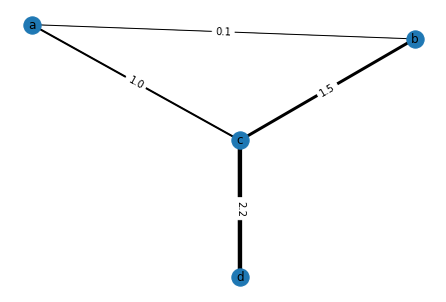

In [31]:
nx.draw(g, pos, with_labels = True)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw_networkx_edges(g, pos, width = [v * 2 for v in weights.values()])
plt.show()

In [32]:
print(nx.shortest_path(g, "b", "d"))
print(nx.shortest_path(g, "d", "b"))

['b', 'c', 'd']
['d', 'c', 'b']


In [34]:
facebook_graph = nx.read_edgelist("./data/facebook_combined.txt")

In [35]:
print(len(facebook_graph.nodes))
print(len(facebook_graph.edges))

4039
88234


In [37]:
karate_graph = nx.karate_club_graph()
centrality = nx.betweenness_centrality(karate_graph)

level 1 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31})
level 2 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
level 3 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})


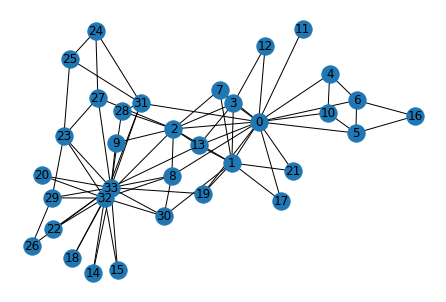

In [38]:
nx.draw(karate_graph, with_labels = True)
communities_generator = community.girvan_newman(karate_graph)
for i in range(1,4):
    communities = next(communities_generator)
    print("level " + str(i), communities)
